# LINATE Quickstart Tutorial

LINATE stands for "Language-Independent Network ATtitudinal Embedding". As suggested by its name, it's a module for embedding social networks (graphs) in attitudinal spaces. Attitudinal spaces are geometrical opinion spaces where dimensions act as indicators of positive or negative opinions (i.e., attitudes) towards identifiable attitudinal objects (e.g., ideological positions such as left- or right-wing ideologies, or policy positions such as increasing tax redistributions).

This module provides tools for two methods: 

1) Ideological embedding: producing a graph embedding in an ideological latent space, where dimensions don't have explicit meaning, but are related to an homophilic model underlying the choises of users forming the graph.

2) Attitudinal embedding: mapping this embedded graph onto a second space that does have explicit meaning for its dimensions. For this, uses the position of some reference points that have known positions in both spaces.

Check our publication for further details:

Ramaciotti Morales, Pedro ,Jean-Philippe Cointet, Gabriel Muñoz Zolotoochin, Antonio Fernández Peralta, Gerardo Iñiguez, and Armin Pournaki. "Inferring Attitudinal Spaces in Social Networks." (2022).
https://hal.archives-ouvertes.fr/hal-03573188/document


Else, the following is the quick tour...


## Embedding a bipartite graph in latent its ideological space

In [1]:
import pandas as pd
from linate import IdeologicalEmbedding

We load a bipartite social graph of reference users $i$ being followed (on Twitter) by users $j$.

<span style="color:red">ISSUE 1) Here I have specified that the bipartite graph has string entries (the name of the nodes). This should always be the case by default. We would never want any other type of data. Even if the nodes are listed are integer numbers, we need to treat them as strings.</span>

In [2]:
path_to_data = 'LINATE_quickstart_data/'
bipartite = pd.read_csv(path_to_data+'bipartite_graph.csv',dtype=str)
print('columns :'+str(bipartite.columns))
print('edges: '+str(bipartite.shape[0]))
print('num. of reference nodes i: '+ str(bipartite['i'].nunique()))
print('num. of follower nodes j: '+ str(bipartite['j'].nunique()))

columns :Index(['i', 'j'], dtype='object')
edges: 1786372
num. of reference nodes i: 691
num. of follower nodes j: 306644


We load the model, choosing the number of latent dimensions of the embedding, and the number of neighbohrs that a users $j$ must have to be kept in the bipartite graph (we normally want users that have made enough choices).

In [3]:
ideoembedding_model = IdeologicalEmbedding(n_latent_dimensions = 2,in_degree_threshold = 3)

Using Ideological Embedding engine: auto


LINATE works with directed graph because it models networks of social choice: who chooses to connect or follow whom. Thus, we need to specify the direction of edges, which nodes are the source (those that chose) and which ones are the target (those that are chosen).

Note: there are different available "engines" that you should look out depending on how much memory you have on your machine. 

<span style="color:red">Instead of users having to manually rename their dataframes/files, it would be better if it was an option to pass to the fit method in the form of a dictionary: {'target':'i','source':'j'}, something like: ideoembedding_model.fit(bipartite,columns={'target':'i','source':'j'}), with value columns=None, the default, trying to infer if there are in fact columns "target" or "source"</span>

In [4]:
bipartite.rename(columns={'i':'target','j':'source'},inplace=True)

In [5]:
ideoembedding_model.fit(bipartite)

Bipartite network: False
Computing Ideological Embedding...


IdeologicalEmbedding(in_degree_threshold=3)

In [6]:
target_coords = ideoembedding_model.ideological_embedding_target_latent_dimensions_
target_coords

,latent_dimension_0,latent_dimension_1
target_id,,
645,0.837642,0.862119
343,0.888366,0.790750
659,0.874273,0.751739
328,0.544900,0.504454
182,0.565296,-0.144197
...,...,...
184,1.059021,0.330456
35,1.040260,0.232806
761,0.784509,0.769507


In [8]:
source_coords = ideoembedding_model.ideological_embedding_source_latent_dimensions_
source_coords

,latent_dimension_0,latent_dimension_1
source_id,,
108730,0.107140,0.550197
307685,0.790345,1.109580
297595,0.700278,0.587875
4117,0.721754,0.923273
21901,1.055946,0.970243
...,...,...
256106,1.318805,0.383266
256109,1.318805,0.383266
42777,1.294042,0.250162


Reference users often come in groups, which is helpful for interpreting what dimensions are capturing. For this, we need a file identifying each reference users $i$ with a group $k$.

<span style="color:red">ISSUE 2) Names of references and of groups need to be strings by default. Here I had to specify it. This is important for the matchings later</span>

In [10]:
df_ref_group=pd.read_csv(path_to_data+'reference_group.csv', dtype=str)

In [11]:
df_ref_group

,i,k
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
822,822,9
823,823,9
824,824,9
825,825,9


<span style="color:red">ISSUE 3) The following line for mapping tables is an operation that I do very often, but have never found a more elegant way of doing it? Isn't there a way in which I don't have to create a Series?</span>

In [12]:
target_coords['k'] = target_coords.index.map(pd.Series(index=df_ref_group['i'].values,data=df_ref_group['k'].values))
target_coords

,latent_dimension_0,latent_dimension_1,k
target_id,,,
645,0.837642,0.862119,5
343,0.888366,0.790750,4
659,0.874273,0.751739,5
328,0.544900,0.504454,4
182,0.565296,-0.144197,3
...,...,...,...
184,1.059021,0.330456,3
35,1.040260,0.232806,0
761,0.784509,0.769507,8


Let's plot the ideological positions of references and followers. 

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
color_dic = {'0':'blue','1':'red','2':'gold','3':'orange','4':'green',
             '5':'violet','6':'cyan','7':'magenta','8':'brown','9':'gray'}

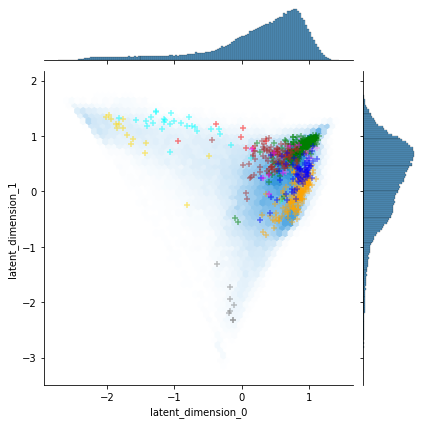

In [14]:
g = sn.jointplot(data=source_coords.drop_duplicates(),x='latent_dimension_0',y='latent_dimension_1',kind="hex")
ax=g.ax_joint
for k in target_coords['k'].unique():
    df_k = target_coords[target_coords['k']==k]
    ax.scatter(df_k['latent_dimension_0'],df_k['latent_dimension_1'],
               marker='+',s=30,alpha=0.5,color=color_dic[k])

## Embedding a bipartite graph in an attitudinal reference space

<span style="color:red">ISSUE 4) Here we confront again the problem of data types for indices. How to load by default the "entity" column in string? Maybe we need to detect automatically the columns that are not float? In the following cell, I had to manually convert "k" to string. This is a tricky one, I think.</span>

In [15]:
group_attitudes = pd.read_csv(path_to_data+'group_attitudes.csv')
group_attitudes['k'] = group_attitudes['k'].astype(str)
group_attitudes

,k,issue_1,issue_2
0,1,2.875000,4.285714
1,2,0.875000,9.571428
2,3,8.125000,3.714286
3,4,6.333334,5.000000
4,5,6.250000,3.666667
5,6,1.125000,6.857143
6,8,3.125000,3.857143
7,9,6.875000,9.428572


In [16]:
group_ideologies = target_coords.groupby('k').mean()
group_ideologies

,latent_dimension_0,latent_dimension_1
k,,
0,0.830685,0.311194
1,-0.104493,0.957754
2,-1.606606,0.986553
3,0.826661,-0.009748
4,0.888847,0.799283
5,0.932633,0.707641
6,-0.907973,1.137397
7,0.491402,0.490700
8,0.499238,0.606620


(Text(0.5, 0, 'issue_1'), Text(0, 0.5, 'issue_2'))

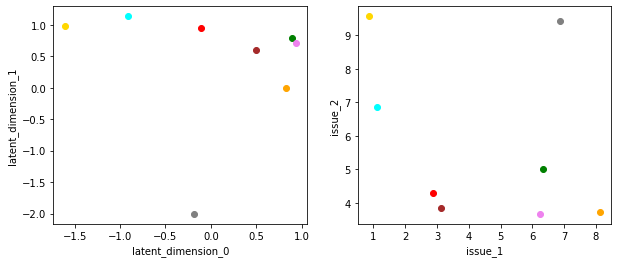

In [17]:
fig = plt.figure(figsize=(10,4))# width, height inches
ax = {1:fig.add_subplot(1,2,1),2:fig.add_subplot(1,2,2)}
for k,row in group_ideologies[group_ideologies.index.isin(group_attitudes['k'])].iterrows():
    ax[1].plot(row['latent_dimension_0'],row['latent_dimension_1'],'o',color=color_dic[k])
ax[1].set_xlabel('latent_dimension_0'),ax[1].set_ylabel('latent_dimension_1')
for k,row in group_attitudes.iterrows():
    ax[2].plot(row['issue_1'],row['issue_2'],'o',color=color_dic[row['k']])
ax[2].set_xlabel('issue_1'),ax[2].set_ylabel('issue_2')

In [18]:
from linate import AttitudinalEmbedding
attiembedding_model = AttitudinalEmbedding(N = 2)

<span style="color:red">ISSUE 5) The attitudinal embedding part requires a column named "entity". Shouldn't it be better if the arrays output by the ideological embedding part had already that column? Also, there needs to be more clarity about what "entity" is: reference entity id? follower entity id? group entity id?</span>

In [19]:
target_coords['entity'] = target_coords.index 
target_coords

,latent_dimension_0,latent_dimension_1,k,entity
target_id,,,,
645,0.837642,0.862119,5,645
343,0.888366,0.790750,4,343
659,0.874273,0.751739,5,659
328,0.544900,0.504454,4,328
182,0.565296,-0.144197,3,182
...,...,...,...,...
184,1.059021,0.330456,3,184
35,1.040260,0.232806,0,35
761,0.784509,0.769507,8,761


So first we give targets ideological positions and target-group table

In [20]:
X = attiembedding_model.convert_to_group_ideological_embedding(target_coords, df_ref_group.rename(columns={'i':'entity','k':'group'}))

<span style="color:red">For example, ref_group table is required to have "entity" and "group" columns. But then X is output with a column "entity" for groups.</span>

In [21]:
X

,entity,latent_dimension_0,latent_dimension_1
0,0,0.830685,0.311194
1,1,-0.104493,0.957754
2,2,-1.606606,0.986553
3,3,0.826661,-0.009748
4,4,0.888847,0.799283
5,5,0.932633,0.707641
6,6,-0.907973,1.137397
7,7,0.491402,0.490700
8,8,0.499238,0.606620
9,9,-0.182908,-2.006873


In [22]:
Y=group_attitudes.rename(columns={'k':'entity'})

In [23]:
attiembedding_model.fit(X, Y)

Groups:  ['1' '2' '3' '4' '5' '6' '8' '9']
Y columns:  3 Index(['entity', 'issue_1', 'issue_2'], dtype='object')


AttitudinalEmbedding(N=2)

In [24]:
target_coords['entity'] = target_coords.index
target_coords

,latent_dimension_0,latent_dimension_1,k,entity
target_id,,,,
645,0.837642,0.862119,5,645
343,0.888366,0.790750,4,343
659,0.874273,0.751739,5,659
328,0.544900,0.504454,4,328
182,0.565296,-0.144197,3,182
...,...,...,...,...
184,1.059021,0.330456,3,184
35,1.040260,0.232806,0,35
761,0.784509,0.769507,8,761


In [25]:
target_attitudinal = attiembedding_model.transform(target_coords)
target_attitudinal

,entity,issue_1,issue_2
0,645,5.556630,3.402353
1,343,5.762217,3.371493
2,659,5.783593,3.451149
3,328,5.396766,4.510138
4,182,6.306487,5.246686
...,...,...,...
686,184,6.747625,3.533668
687,35,6.837071,3.694941
688,761,5.564562,3.636874
689,744,6.140659,3.989951


In [26]:
target_attitudinal['k'] = target_attitudinal['entity'].map(pd.Series(index=df_ref_group['i'].values,data=df_ref_group['k'].values))
target_attitudinal

,entity,issue_1,issue_2,k
0,645,5.556630,3.402353,5
1,343,5.762217,3.371493,4
2,659,5.783593,3.451149,5
3,328,5.396766,4.510138,4
4,182,6.306487,5.246686,3
...,...,...,...,...
686,184,6.747625,3.533668,3
687,35,6.837071,3.694941,0
688,761,5.564562,3.636874,8
689,744,6.140659,3.989951,8


In [27]:
source_coords['entity'] = source_coords.index
source_coords

,latent_dimension_0,latent_dimension_1,entity
source_id,,,
108730,0.107140,0.550197,108730
307685,0.790345,1.109580,307685
297595,0.700278,0.587875,297595
4117,0.721754,0.923273,4117
21901,1.055946,0.970243,21901
...,...,...,...
256106,1.318805,0.383266,256106
256109,1.318805,0.383266,256109
42777,1.294042,0.250162,42777


In [28]:
source_attitudinal = attiembedding_model.transform(source_coords)
source_attitudinal

,entity,issue_1,issue_2
0,108730,4.383169,5.465299
1,307685,5.123584,3.212567
2,297595,5.623582,4.050722
3,4117,5.222873,3.595961
4,21901,5.887420,2.767848
...,...,...,...
305960,256106,7.242466,2.870246
305961,256109,7.242466,2.870246
305962,42777,7.366149,3.088204
305963,27665,7.366149,3.088204


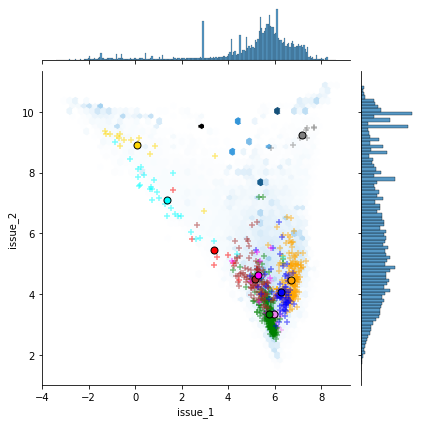

In [29]:
g = sn.jointplot(data=source_attitudinal.drop_duplicates(),x='issue_1',y='issue_2',kind="hex")
ax=g.ax_joint
for k in target_attitudinal['k'].unique():
    df_k = target_attitudinal[target_attitudinal['k']==k]
    df_k_mean = df_k[['issue_1','issue_2']].mean()
    ax.scatter(df_k['issue_1'],df_k['issue_2'],marker='+',s=30,alpha=0.5,color=color_dic[k])
    ax.plot(df_k_mean['issue_1'],df_k_mean['issue_2'],'o',mec='k',color=color_dic[k],ms=7)